<a href="https://colab.research.google.com/github/annaotoni/MKT-Prediction-Machine-Learning-model-Python/blob/main/MKT_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MKT Prediction

*   Import and ETL



In [5]:
# Libraries Used
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Initial settings for viewing
sns.set(style="whitegrid")  # Sets the graphics style to white grid

# Dataset
from google.colab import files
uploaded = files.upload()

import io
data = pd.read_csv(io.BytesIO(uploaded['MKT.csv']))

# Showing the first rows of the dataset to check the import
print(data.head())

# Showing basic information about the dataset
data.info()


Saving MKT.csv to MKT.csv
   youtube  facebook  newspaper  sales
0    84.72     19.20      48.96  12.60
1   351.48     33.96      51.84  25.68
2   135.48     20.88      46.32  14.28
3   116.64      1.80      36.00  11.52
4   318.72     24.00       0.36  20.88
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   youtube    171 non-null    float64
 1   facebook   171 non-null    float64
 2   newspaper  171 non-null    float64
 3   sales      171 non-null    float64
dtypes: float64(4)
memory usage: 5.5 KB


In [7]:
# Checking for missing values
print("Missing values ​​in each column:")
print(data.isnull().sum())

# Checking for duplicates
print("\nNumber of duplicates:", data.duplicated().sum())

# Descriptive Statistics
print("\nDescriptive statistics of the variables:")
print(data.describe())

Missing values ​​in each column:
youtube      0
facebook     0
newspaper    0
sales        0
dtype: int64

Number of duplicates: 0

Descriptive statistics of the variables:
          youtube    facebook   newspaper       sales
count  171.000000  171.000000  171.000000  171.000000
mean   178.021053   27.671579   35.240000   16.922807
std    102.449597   17.913532   24.902918    6.314608
min      0.840000    0.000000    0.360000    1.920000
25%     91.080000   11.700000   13.740000   12.540000
50%    179.760000   26.760000   31.080000   15.480000
75%    262.980000   43.680000   50.880000   20.820000
max    355.680000   59.520000  121.080000   32.400000




*   Graphical checks



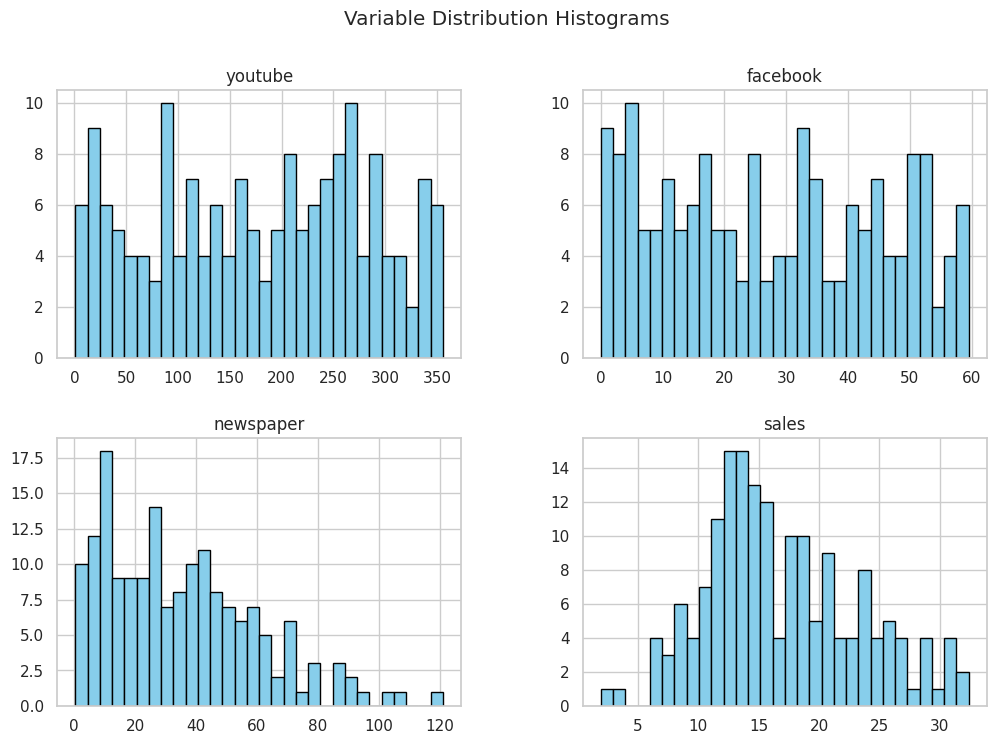

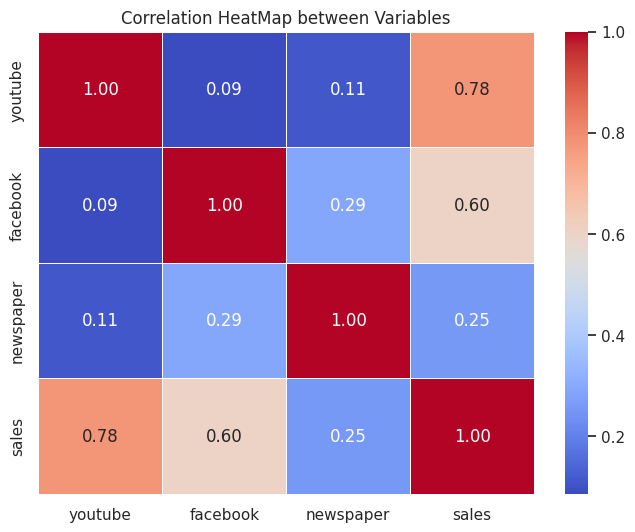

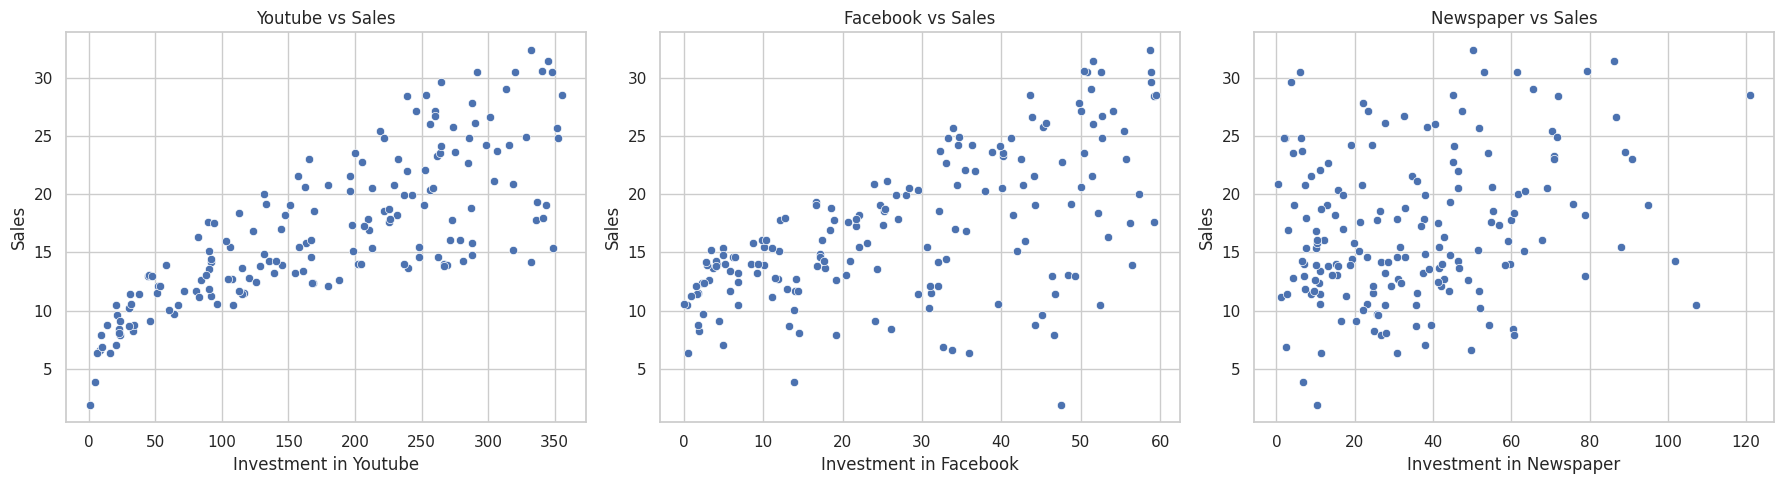

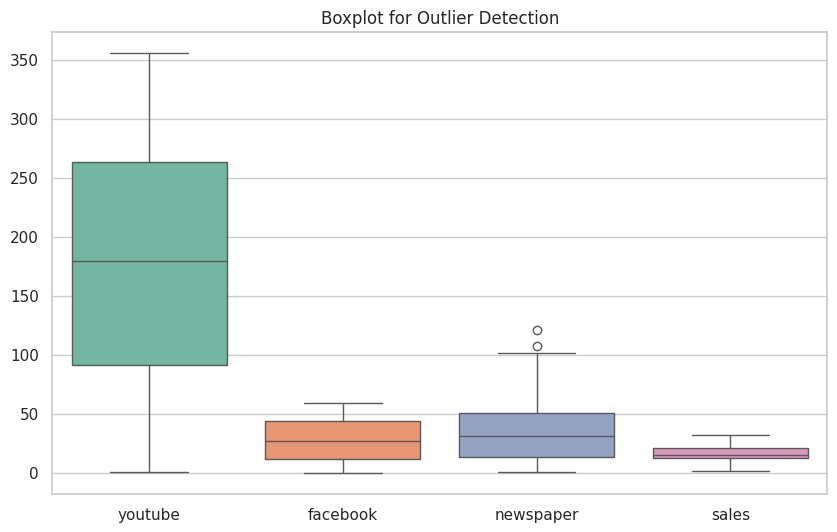

In [9]:
# Histograms to analyze the distribution of each variable
data.hist(bins=30, figsize=(12, 8), color='skyblue', edgecolor='black')
plt.suptitle('Variable Distribution Histograms')
plt.show()

# Heatmap to visualize correlations
plt.figure(figsize=(8, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation HeatMap between Variables')
plt.show()

# Scatterplots for each type of spend versus sales
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for i, feature in enumerate(['youtube', 'facebook', 'newspaper']):
    sns.scatterplot(data=data, x=feature, y='sales', ax=axes[i])
    axes[i].set_title(f'{feature.capitalize()} vs Sales')
    axes[i].set_xlabel(f'Investment in {feature.capitalize()}')
    axes[i].set_ylabel('Sales')
plt.tight_layout()
plt.show()

# Boxplots to identify outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, palette="Set2")
plt.title('Boxplot for Outlier Detection')
plt.show()


*   Building and training the machine learning model



In [11]:
# Importing the model libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 1. Data Preparation
X = data[['youtube', 'facebook', 'newspaper']]  # Independent variables
y = data['sales']  # Dependent variable

# 2. Data Division
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Model Construction
model = LinearRegression()

# 4. Model Training
model.fit(X_train, y_train)

# 5. Model Assessment
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

# Viewing model coefficients
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)


Mean Squared Error: 5.576790234026713
R^2 Score: 0.872863085701216
           Coefficient
youtube       0.044186
facebook      0.194482
newspaper    -0.000049




*  Prediction result


In [12]:
# Function to make sales forecasts based on advertising investments
def forecast_sales(youtube, facebook, newspaper):
    # Inputs are converted to a DataFrame for model compatibility
    investment = pd.DataFrame([[youtube, facebook, newspaper]], columns=['youtube', 'facebook', 'newspaper'])
    predicted_sales = model.predict(investment)
    return predicted_sales[0]

# Forecast examples
print("Sales Forecast for Investment of $100 in Youtube, $150 in Facebook and $50 in Newspaper:")
print(f"${forecast_sales(100, 150, 50):.2f}")

print("\nSales Forecast for Investment of $200 in Youtube, $200 in Facebook and $100 in Newspaper:")
print(f"${forecast_sales(200, 200, 100):.2f}")

print("\nSales Forecast for Investment of $150 in Youtube, $100 in Facebook and $50 in Newspaper:")
print(f"${forecast_sales(150, 100, 50):.2f}")


Sales Forecast for Investment of $100 in Youtube, $150 in Facebook and $50 in Newspaper:
$37.29

Sales Forecast for Investment of $200 in Youtube, $200 in Facebook and $100 in Newspaper:
$51.43

Sales Forecast for Investment of $150 in Youtube, $100 in Facebook and $50 in Newspaper:
$29.78
